In [11]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [12]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["target"] = housing.target

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df = df.reset_index(drop=True)
X = df[housing.feature_names]
targets = df["target"]
# Always use transform_data function on X
scaler = StandardScaler().fit(np.array(targets).reshape(-1, 1))
targets = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

df["target"] = targets
data=df

In [13]:
import sys
sys.path.append('..')

In [14]:
from nampy.models import NAM

In [15]:

nam = NAM(
    "target ~  -1  + MLP(MedInc) + MLP(AveRooms; encoding=one_hot; n_bins=10; hidden_dims=[12, 12, 12]) + MLP(AveOccup) + MLP(AveBedrms) + MLP(Population) + MLP(Latitude):MLP(Longitude)", 
    data=data, 
    feature_dropout=0.0001
    )

--- Preprocessing ---


0it [00:00, ?it/s]

8it [00:03,  2.10it/s]
7it [00:00, 1366.67it/s]


In [16]:
nam.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={"output":"mse"},
    metrics={"output":"mae"},
)

# Train the model
nam.fit(nam.training_dataset, epochs=150, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/150
------------- Network architecture --------------
MedInc -> MLP(feature=MedInc, n_params=12736) -> output dimension=1
AveRooms -> MLP(feature=AveRooms, n_params=456) -> output dimension=1
AveOccup -> MLP(feature=AveOccup, n_params=12736) -> output dimension=1
AveBedrms -> MLP(feature=AveBedrms, n_params=12736) -> output dimension=1
Population -> MLP(feature=Population, n_params=12736) -> output dimension=1
Latitude_._Longitude -> MLP(feature=Latitude_._Longitude, n_params=12864) -> output dimension=1
16/16 [==============================] - 3s 35ms/step - loss: 0.9725 - output_loss: 0.9725 - output_mae: 0.7584 - val_loss: 0.4923 - val_output_loss: 0.4923 - val_output_mae: 0.5355
Epoch 2/150
16/16 [==============================] - 0s 23ms/step - loss: 0.6504 - output_loss: 0.6504 - output_mae: 0.6139 - val_loss: 0.3917 - val_output_loss: 0.3917 - val_output_mae: 0.4550
Epoch 3/150
16/16 [==============================] - 0s 20ms/step - loss: 0.5574 - output_loss: 0.5574 - o

MedInc
AveRooms
AveOccup
AveBedrms
Population
Latitude_._Longitude


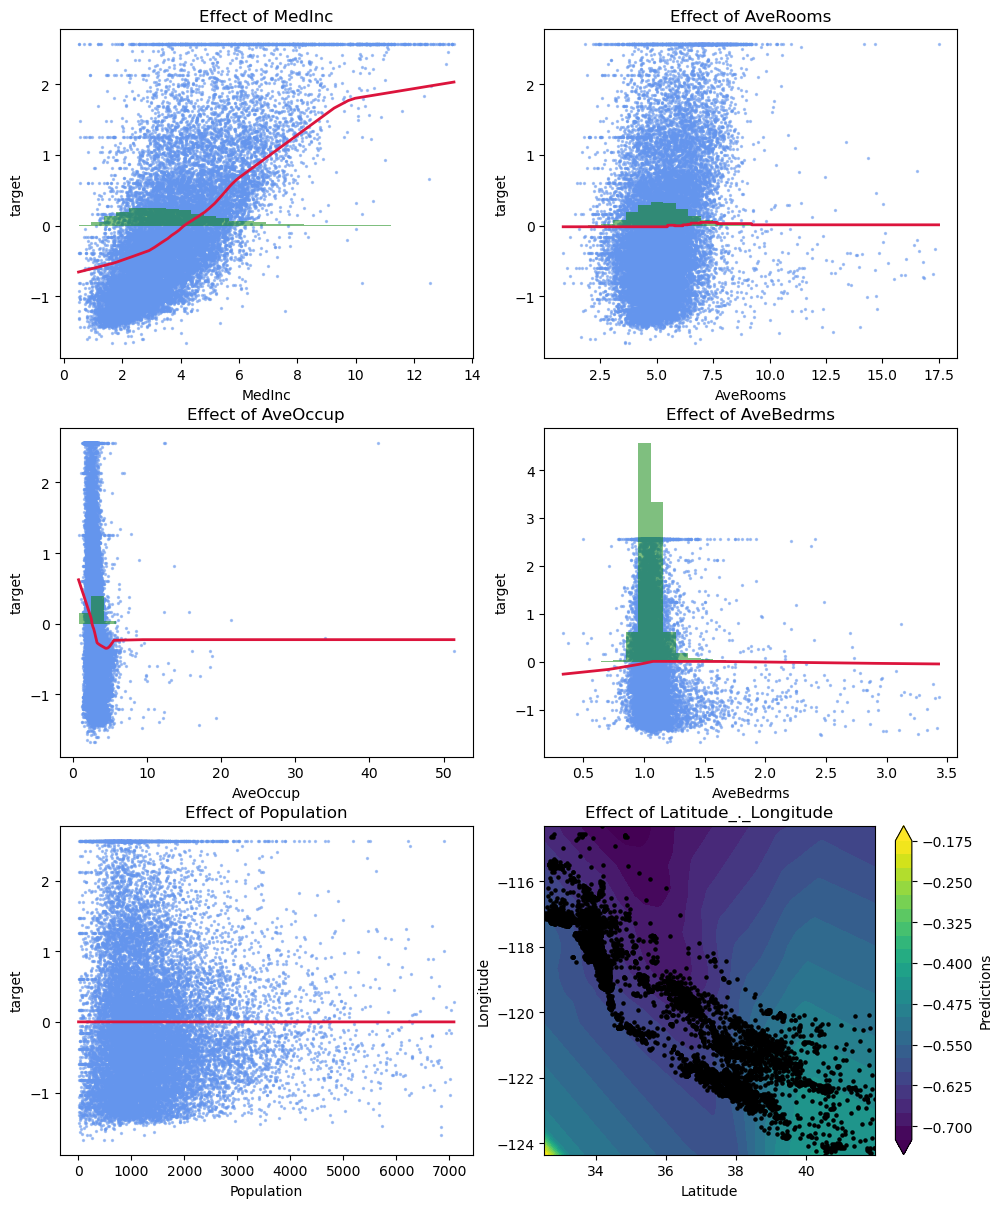

In [17]:
nam.plot()

In [18]:
nam.plot_single_effects(port=8050)

In [19]:
nam.plot_all_effects(port=8053)

--- Preprocessing ---


0it [00:00, ?it/s]

8it [00:09,  1.19s/it]


40/40 [==============================] - 1s 4ms/step


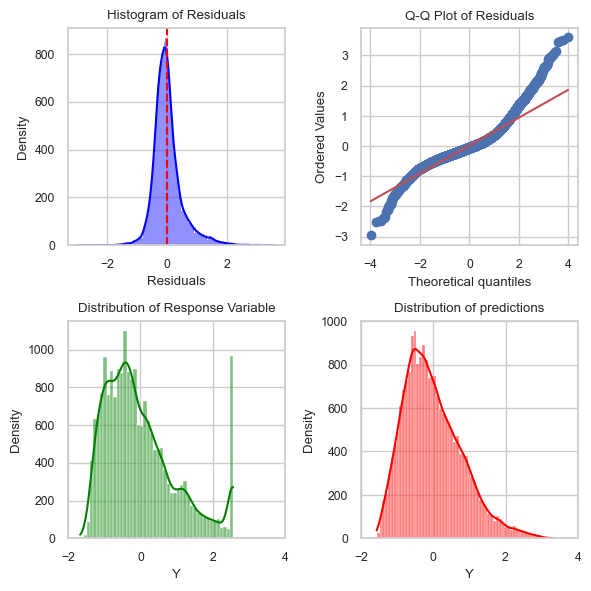

In [20]:
nam.plot_analysis()

In [21]:
significances = nam.get_significance()
significances

16/16 [==============================] - 0s 6ms/step


,feature,t-stat,p_value
0,MedInc,[-4.677],[0.0002]
1,AveRooms,[-0.2611],[0.7964]
2,AveOccup,[-8.3212],[0.0002]
3,AveBedrms,[-1.5275],[0.1198]
4,Population,[0.1145],[0.911]
5,Latitude_._Longitude,[13.5868],[0.0002]
